In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

import re

import nltk
nltk.download('popular')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [6]:
# Affichage de toutes les colonnes sur les dataframe
pd.set_option("display.max_columns", None)

# 0- Extraction des données

## 0.1- Vin du client

In [7]:
link_client = "https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv"
df_client = pd.read_csv(link_client)

df_client.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


## 0.2- Dataset des vins du marché américain

In [8]:
link_dataset = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link_dataset)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# 1- Exploration des données

## 1.1- Observation des statistiques descriptives

In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 129957 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA      ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ points           │       0 │       0 │    88.45 │    3.039 │   80 │    86 │    88 │   91 │   100 │  ▁▅▇▇▁  │  │
│ │ price            │    8993 │    6.92 │    36.39 │     32.8 │    2 │    21 │    29 │   42 │  1902 │    ▇    │  │
│ └──────────────────┴─────────┴─────────┴──────────┴──────────┴──────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %       ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ country                            │         63 │       0.05 │                      1 │             132730 │  │
│ │ description                        │          0 │          0 │                     40 │            5248223 │  │
│ │ designation                        │      37460 │      28.82 │                    1.7 │             214528 │  │
│ │ province                           │         63 │       0.05 │                    1.3 │             163231 │  │
│ │ region_1                           │      21247 │      16.35 │                    1.7 │             215779 │  │
│ │ region_2                           │      79446 │      61.13 │                   0.65 │              84242 │  │
│ │ taster_name                        │      26244 │      20.19 │                    1.7 │             221222 │  │
│ │ taster_twitter_handle              │      31213 │      24.02 │                   0.76 │              98744 │  │
│ │ title                              │          0 │          0 │                    7.7 │             998206 │  │
│ │ variety                            │          1 │          0 │                    1.6 │             210996 │  │
│ │ winery                             │          0 │          0 │                    1.9 │             244993 │  │
│ └────────────────────────────────────┴────────────┴────────────┴────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
# extraction des années (milesime) depuis la series title
df['milesime'] = df['title'].apply(lambda x: int(re.search(r'\b(19[0-9]{2}|20[0-1][0-9]|202[0-4])\b', x).group(0)) if (re.search(r'\b(19[0-9]{2}|20[0-1][0-9]|202[0-4])\b', x))  else None)


In [11]:
# extraction de la region_1 depuis title --> entre parentheses
df['region1_title'] = df['title'].apply(lambda x: re.search(r'\((.*?)\)', x).group(0).replace('(','').replace(')','') if (re.search(r'\((.*?)\)', x))  else None)

In [12]:
# comparaison de region1_title et region_1. Si region_1 est NaN alors prendre la valeur de region1_title
df['region_1'] = df.apply(lambda x: x['region1_title'] if pd.isna(x['region_1']) else x['region_1'], axis=1)

df.drop(columns=['region1_title'], inplace=True)

In [13]:
# remplacement des NA de country, province, region_1 par unknown
df['country'] = df['country'].fillna('unknown')
df['province'] = df['province'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['region_2'] = df['region_2'].fillna('unknown')

In [14]:
# modification des types des Series pour les category
df['country'] = df['country'].astype('category')
df['province'] = df['province'].astype('category')
df['region_1'] = df['region_1'].astype('category')
df['region_2'] = df['region_2'].astype('category')
df['variety'] = df['variety'].astype('category')
df['winery'] = df['winery'].astype('category')

In [15]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 129957 │ │ category    │ 6     │ │ country               │                                │
│ │ Number of columns │ 14     │ │ string      │ 5     │ │ province              │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ │ region_1              │                                │
│                                │ int64       │ 1     │ │ region_2              │                                │
│                                └─────────────┴───────┘ │ variety               │                                │
│                                                        │ winery                │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA     ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ points          │      0 │      0 │   88.45 │   3.039 │     80 │     86 │     88 │    91 │   100 │  ▁▅▇▇▁  │  │
│ │ price           │   8993 │   6.92 │   36.39 │    32.8 │      2 │     21 │     29 │    42 │  1902 │    ▇    │  │
│ │ milesime        │   4626 │   3.56 │    2017 │   4.136 │   1900 │   2015 │   2017 │  2019 │  2023 │      ▇  │  │
│ └─────────────────┴────────┴────────┴─────────┴─────────┴────────┴────────┴────────┴───────┴───────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ country                          │         0 │              0 │ False                 │                 44 │  │
│ │ province                         │         0 │              0 │ False                 │                426 │  │
│ │ region_1                         │         0 │              0 │ False                 │               1598 │  │
│ │ region_2                         │         0 │              0 │ False                 │                 18 │  │
│ │ variety                          │         1 │              0 │ False                 │                708 │  │
│ │ winery                           │         0 │              0 │ False                 │              16756 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %       ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━

## 1.1.bis- Observation sur les statistiques descriptives

#### Points :  
- Aucune valeur manquante.
- la distribution semble uniformement repartie
- Aucun point à zéro

#### price :  
- Il y a 6.9% de valeur manquante
- Aucun prix à zéro
- le p100 montre qu'il y a des valeurs extremes (outliers) la disttribution semble eêtre non symétrique

A faire:  
    - Vérifier la distribution sans les outliers


#### Country :
- Il y a 44 pays
- Il manque seulement 0.05% de données dans cette colonne  

A faire  
    - Regarder la distribution des différents vins en fonction des pays

#### Province :
- Il y a 426 pays
- Il manque seulement 0.05% de données dans cette colonne  

A faire  
    - Les bouteilles où les provinces sont manquantes sont elles les mêmes que pour les pays ?
    - Regarder la distribution des différents vins en fonction des province
    - Regarder les distribution du nombre de province par pays

#### Region_1 et region_2
- Beaucoup de données manquantes.
- Beaucoup de categorie pour region_1 et peu pour region_2 (probablement lié au manque d'information)

A faire:
    - Regarder la distribution des vins par catégorie.

Ces variables ne sont pas tellement categoriulees mais plutôt descriptives

#### Variety et Winery
- Quasiment aucune données manquantes
- Le nombre de categories variety est de 708 soit  environ 185 bouteille par varieté en moyen --> la category est représentative
- Le nombre de categories Winery est de 16 756 soit environ 8 bouteille par winery en moyenne --> la catégorie semble peu significative

A faire :
    - Regarder la distribution des nombres de bouteille en fonction de ces deux catégories.

#### Title et Description
- Pas de valeur manquantes

A faire:
    - Faire un wordcloud sur les deux catégories pour voir si des informations peuvent se détacher
    - Evaluer la pertinence de trier le wordcloud en fonction de différents facteurs (tels que le prix, le nb de point, la variété, le pays, la province...)

#### designation, taster_name et taster_twitter_handle
- aux alentours de 20 % de valeurs manquantes

Commentaire : pas de travail sur ces variables

## 1.2- Visualisation univariée

### 1.2.1- Données numériques

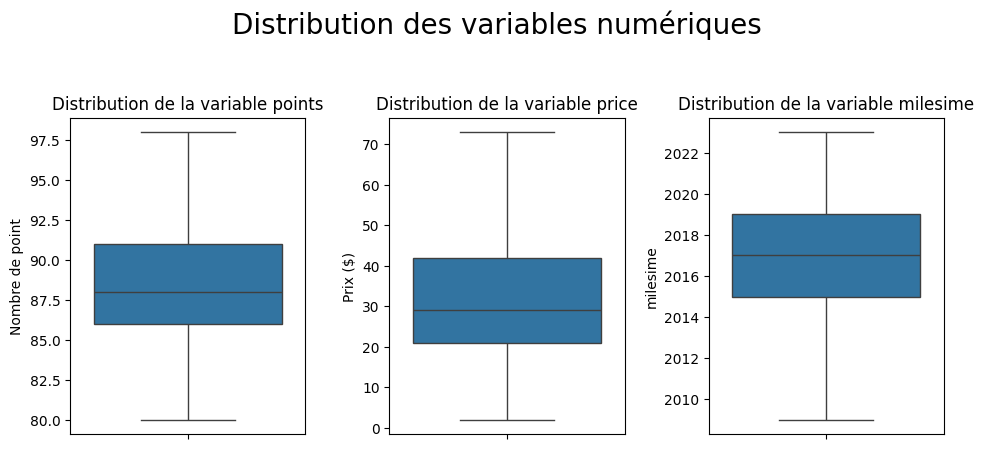

In [16]:
# affichage des distributions pour les type numerique
df_num = df.select_dtypes('number')

y_title = ['Nombre de point', 'Prix ($)', 'milesime']


fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Distribution des variables numériques', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num[col],  ax=axes[i], showfliers = False)
    axes[i].set_title(f'Distribution de la variable {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(y_title[i])

plt.show()

Pour essayer de réduire l'impacte des outliers sur la variable prix , mise en place d'un clustering sur le prix des bouteilles et sur les points

### 1.2.2- Données catégorielles

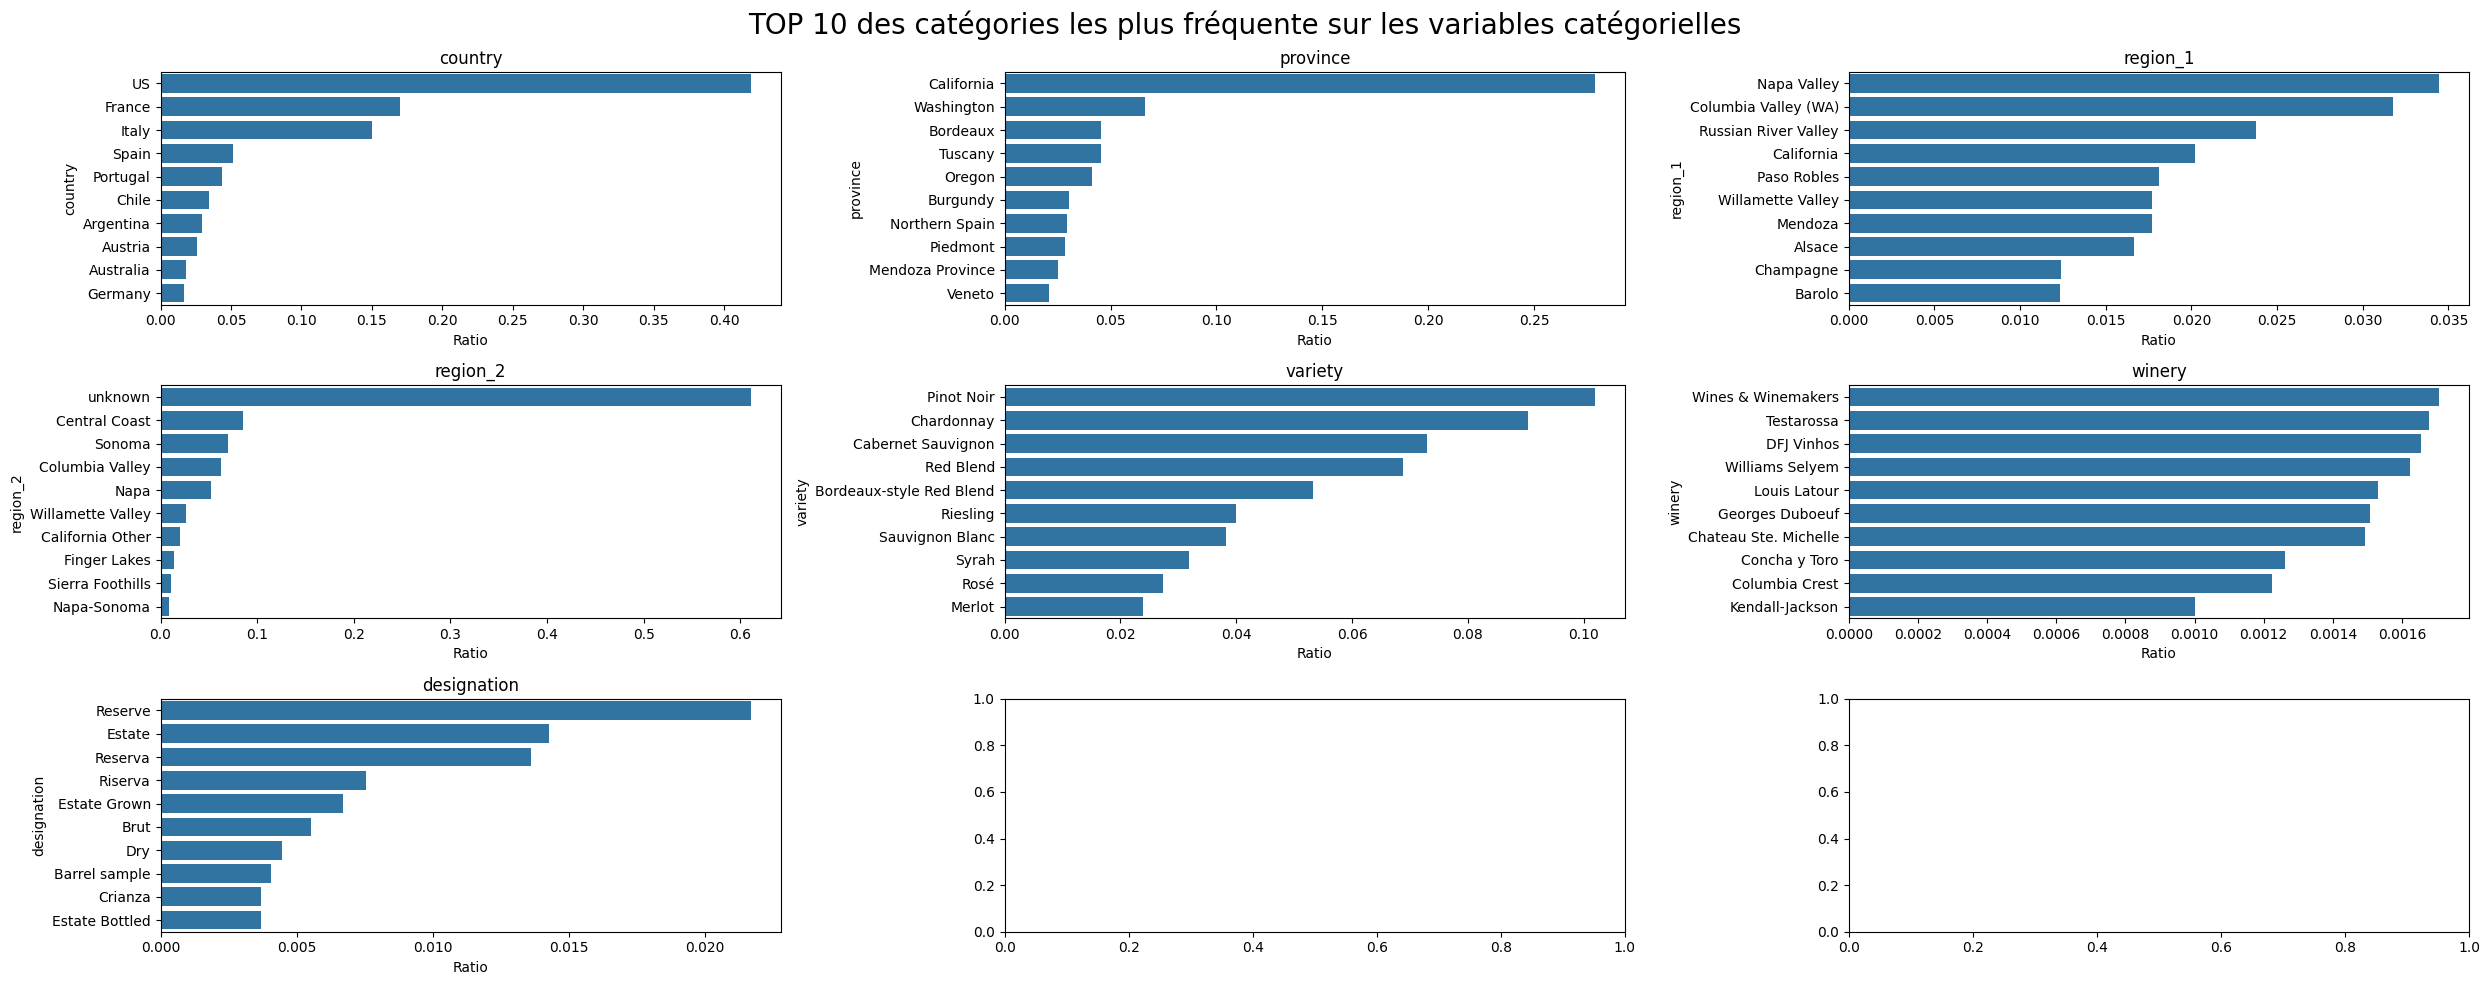

In [17]:
df_cat = df[['country', 'province', 'region_1', 'region_2', 'variety', 'winery', 'designation']]


fig, axes = plt.subplots(3, 3, figsize=(25, 10))
fig.suptitle('TOP 10 des catégories les plus fréquente sur les variables catégorielles', fontsize=20)
fig.tight_layout(pad=3.0)

# Parcourir chaque colonne et créer un barplot
for i, col in enumerate(df_cat.columns):

     # Calculer les proportions pour chaque catégorie pour les 10 plus grande
    df_group = df_cat[col].value_counts(normalize=True).head(10)

    sns.barplot(y=list(df_group.index), x=list(df_group.values), ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel('Ratio')
    axes[i//3, i%3].set_ylabel(col)

plt.tight_layout()
plt.show()


#### Conclusion sur visualiation catégorielle

La représentation graphique permet de confirmer les hypothès émises lors de l'observation descriptive  

Une mise en place de clustering sur les variable country, variety et portentielement province peut etre interressant pour essayer d'observer un rapprochement avec les variables prix ou points

### 1.2.3- Données descriptives

#### 1.2.3.1- Préparation des variables pour wordcloud

In [18]:
def nett_texte(texte:str)->str:

    texte_nett = texte.lower()
    texte_nett = texte_nett.strip() # suppression des espaces au debut et à la fin fin de la caine
    texte_nett = re.sub(r"[^\w\s,%]", '', texte_nett) # suppression des ponctuations
    texte_nett = re.sub(r'[0-9]{4}', '', texte_nett) # suppression des date (année)

    return texte_nett

In [19]:
# nettoyage des textes sur les Series tile et description
df['title_clean'] = df['title'].apply(nett_texte)
df['description_clean'] = df['description'].apply(nett_texte)

In [20]:
# création de deux variables texte depuis le dataframe
chaine_title = ' '.join(df['title_clean'])
chaine_description = ' '.join(df['description_clean'])

In [21]:
# Passage sous forme de liste de mot des deux textes
words_title = nltk.word_tokenize(chaine_title)
words_description = nltk.word_tokenize(chaine_description)

In [22]:
# Convertir les listes de mots en DataFrame pour optimiser le traitement des stopwords plutot qu'une boucle
df_title = pd.DataFrame(words_title, columns=['word'])
df_description = pd.DataFrame(words_description, columns=['word'])

# Filtrer les stopwords
token_clean_title = df_title[~df_title['word'].isin(stop_words)]['word'].tolist()
token_clean_description = df_description[~df_description['word'].isin(stop_words)]['word'].tolist()


#### 1.2.3.2- Affichage du wordcloud variable title


In [23]:
# concatenation en texte de la liste de mots
texte_wordcloud_title = ' '.join(token_clean_title)

In [24]:
# integration du nouveau texte dans le dataframe
df['title_clean'] = texte_wordcloud_title

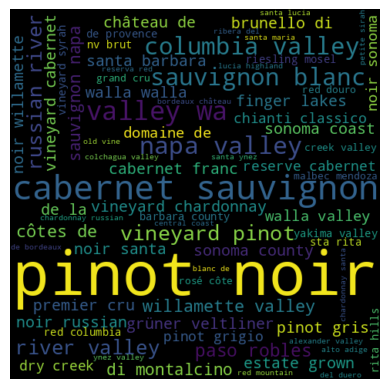

In [25]:
# WordCloud avec generate_from_text

wordcloud = WordCloud(width = 480, height= 480, max_font_size= 200, min_font_size= 10)

wordcloud.generate_from_text(texte_wordcloud_title)

plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

#### 1.2.3.3- Affichage du wordcloud variable description

In [26]:
# concatenation en texte de la liste de mots
texte_wordcloud_description = ' '.join(token_clean_description)

In [27]:
#integration du nouveau texte dans le dataframe
df['description_clean'] = texte_wordcloud_description

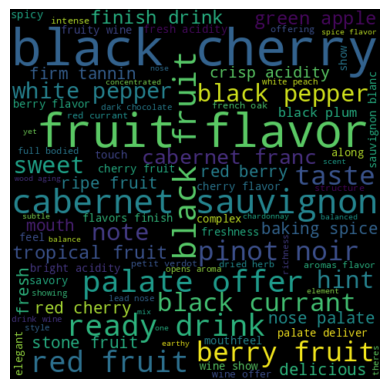

In [28]:
wordcloud = WordCloud(width = 480, height= 480, max_font_size= 200, min_font_size= 10)

wordcloud.generate_from_text(texte_wordcloud_description)

plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

#### 1.2.3.4- Conclusion sur les nuages de mots

Sur la variable title, nous pouvons observer les mots  :
- Pinot noir
- cabernet sauvignon
- Nappa valley

Qui semblent être les plus fréquents.

Sur la variable description, nous pouvons observer revenir en majorité les mots :
- black cherry
- fruit flavor
- Cabernet Sauvignon
- full bodied
- black fruit

Il est difficile de conclure de manière certaine sur cette répartition.

Une intégration de ces variable sur un modèle de prédiction peut être interressante pour obtenir une prcision plus forte dans la bonne évaluation du prix du vin de notre client.

## 1.3- Mise en place des différents cluster avant l'analyse multivariée suite à l'analyse univariée

### 1.3.1- Clustering prix

In [29]:
# ajout d'un cluster sur le prix aléatoirement

bins = [0, 6, 11, 21, 51, 151, np.inf]
labels = ['0-5', '6-10', '11-20', '21-50', '51-150', '151+']
df['price_group'] = pd.cut(df['price'], bins=bins, labels=labels)

In [30]:
# ajout d'un cluster sur le prix basé sur les quartile

bins = [0, 21, 29, 42, np.inf]
labels = ['0-20', '21-28', '29-41', '42+']
df['price_group_Q'] = pd.cut(df['price'], bins=bins, labels=labels)

### 1.3.2- Clustering points

In [31]:
# ajout d'un cluster sur la variable points basé sur les quartiles
bins = [0, 86, 89, 92, np.inf]
labels = ['0-85', '86-88', '89-91', '92+']
df['points_group_Q'] = pd.cut(df['points'], bins=bins, labels=labels)

### 1.3.3- clustering country

In [32]:
# ajout d'un cluster other pour les moins frequents
df_group_country = df['country'].value_counts(normalize=True).head(10)

list_pays_cluster = list(df_group_country.index)

df['cluster_country'] = df['country'].apply(lambda x: x if x in list_pays_cluster else 'other')


### 1.3.4- Clustering Variety

In [33]:
# ajout d'un cluster other pour les moins frequents
df_group_variety = df['variety'].value_counts(normalize=True).head(10)

list_variety_cluster = list(df_group_variety.index)

df['cluster_variety'] = df['variety'].apply(lambda x: x if x in list_variety_cluster else 'other')

### 1.3.5- Clustering designation

In [34]:
# ajout d'un cluster other pour les moins frequents
df_group_designation = df['designation'].value_counts(normalize=True).head(10)

list_designation_cluster = list(df_group_designation.index)

df['cluster_designation'] = df['designation'].apply(lambda x: x if x in list_designation_cluster else 'other')

### 1.3.6- Clustering province

In [35]:
# ajout d'un cluster other pour les moins frequents
df_group_province = df['province'].value_counts(normalize=True).head(10)

list_province_cluster = list(df_group_province.index)

df['cluster_province'] = df['province'].apply(lambda x: x if x in list_province_cluster else 'other')

## 1.4- Analyse et visualisation bivariée et multivariée

### 1.4.1- Lien et correlation entre price et point et milesime

In [36]:
# calcul des coefficients de correlation et affichage de la matrcie
corr = df[['points','price', 'milesime']].corr()
corr

,points,price,milesime
points,1.000000,0.473508,0.044723
price,0.473508,1.000000,-0.309358
milesime,0.044723,-0.309358,1.000000


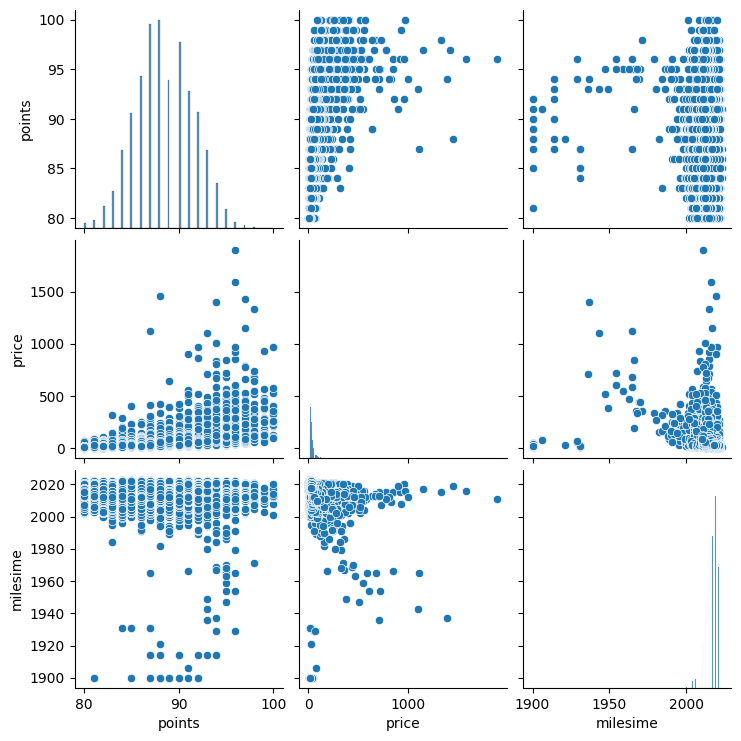

In [37]:
# affichage du pairplot pour observer d'éventuelles corrélation
sns.pairplot(df, vars=['points','price', 'milesime'])
plt.show()

La correlation entre les points et le prix est moyenne (0.47 de coefficient de correlation )   

On voit malgré tout graphiquement que plus lenombre de points augment et plus le plrix maximal d'une bouteille est fort

In [38]:
# prparation du df pour clusteriser par pays median pour price (vu la distribution) et moyenne pour points( vu la distribution)

df_groupby_pays = df.groupby('cluster_country').agg({'price': 'median', 'points': 'mean'}).reset_index()
df_groupby_pays.head(2)

,cluster_country,price,points
0,Argentina,21.0,86.710263
1,Australia,30.0,88.580507


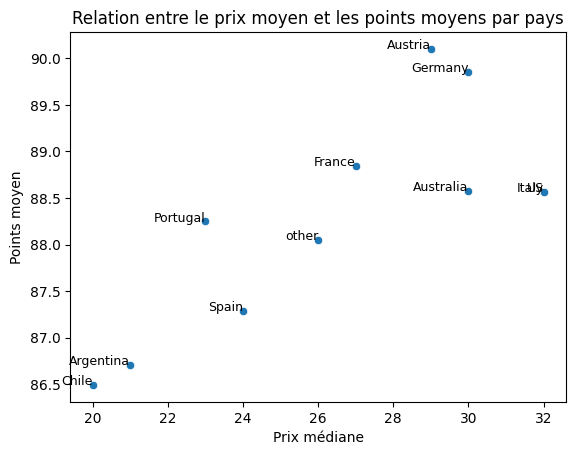

In [39]:
# Affichage du prix moyen et du point moyen en clusturisant par les pays clusterisé
sns.scatterplot(data=df_groupby_pays, x='price', y='points')

for i, row in df_groupby_pays.iterrows():
    plt.text(row['price'], row['points'], row['cluster_country'], fontsize=9, ha='right')

plt.xlabel('Prix médiane')
plt.ylabel('Points moyen')
plt.title('Relation entre le prix moyen et les points moyens par pays')

plt.show()

In [40]:
# calcul du coefficient de correlation
df_groupby_pays[['price', 'points']].corr()

,price,points
price,1.000000,0.767142
points,0.767142,1.000000


Dans ce cas il y a une meilleur correlation entre price et points en groupant par pays.  
On peut mettre en relation de correlation les prix médian et les points moyen quand il sont regroupés par pays

### 1.4.1.bis- Remplacement des prix manquant par la median par cluster de pays

Uniquement pour le Machine Learning --> non nécessaire pour l'analyse par dashboard

In [41]:
# def replace_price(row, df_groupby_pays):
#     if pd.isna(row['price']):
#         price = df_groupby_pays.loc[df_groupby_pays['cluster_country'] == row['cluster_country'], 'price'].values
#         if len(price) > 0:
#             return price[0]
#         else:
#             return np.nan  # retourne NaN si aucun prix correspondant n'est trouvé
#     else:
#         return row['price']

In [42]:
# Appliquer la fonction sur chaque ligne du dataframe
# df['price'] = df.apply(lambda row: replace_price(row, df_groupby_pays), axis=1)

In [43]:
# Retravail du cluster pri_Q pour mise à jour suite remplissage NaN sur price

# bins = [0, 21, 29, 42, np.inf]
# labels = ['0-20', '21-28', '29-41', '42+']
# df['price_group_Q'] = pd.cut(df['price'], bins=bins, labels=labels)


### 1.4.2- Observation des distributions de prix en fonction des cluster

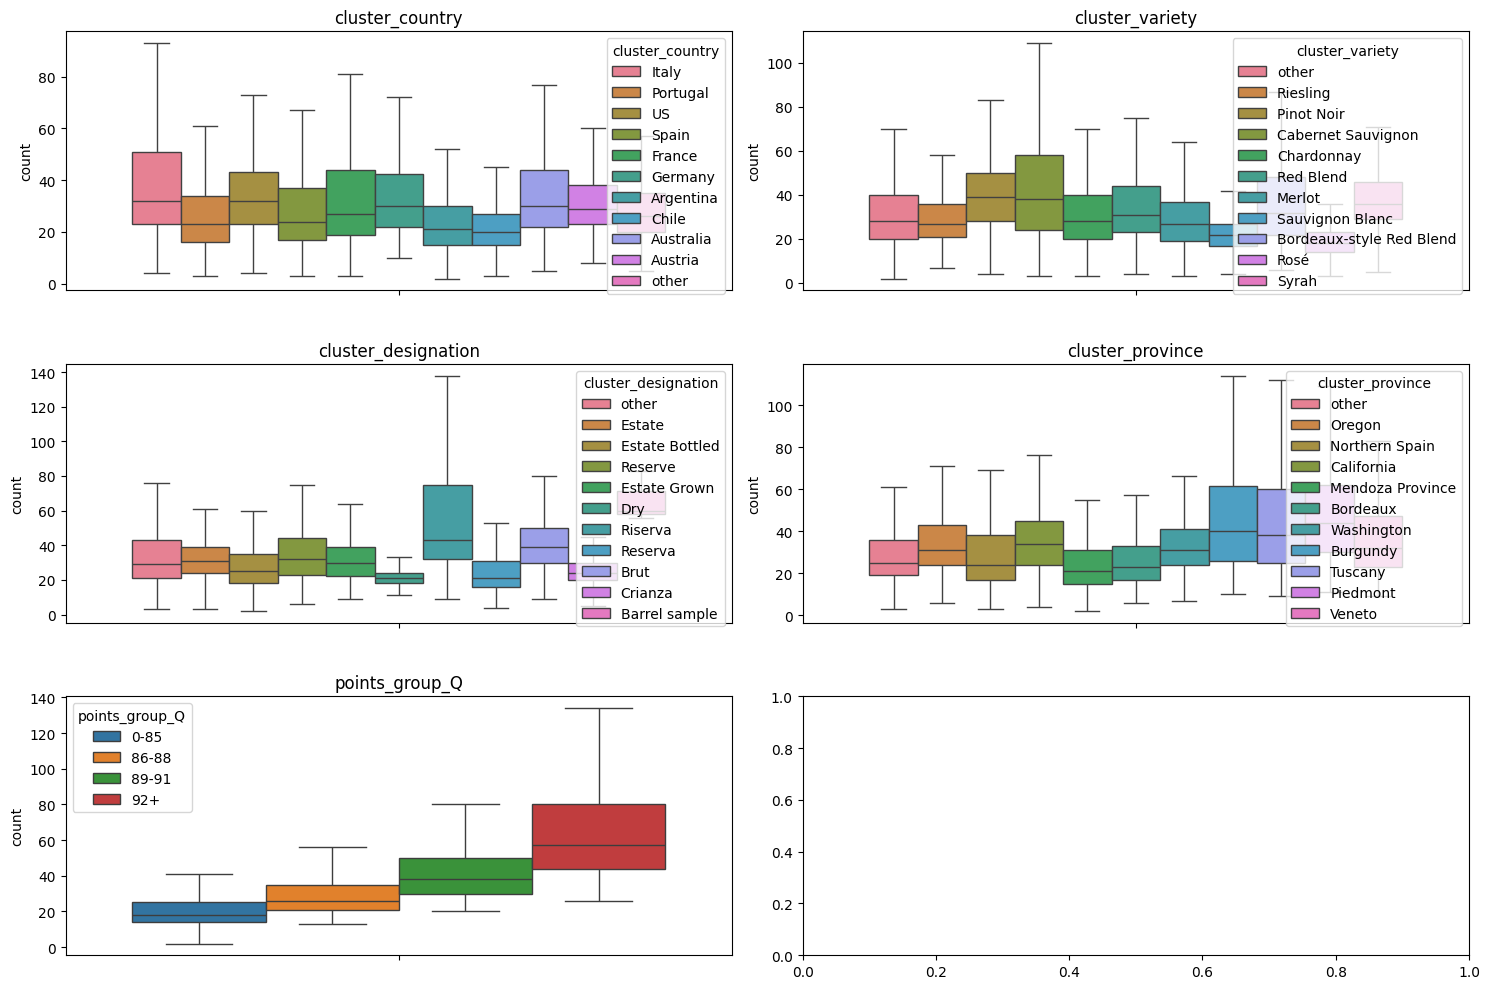

In [44]:
i= 0
nb_col = 2
nb_lig = 3
clusters = ['cluster_country', 'cluster_variety', 'cluster_designation', 'cluster_province', 'points_group_Q']

fig, axes = plt.subplots(nb_lig, nb_col, figsize=(15,10))

for cluster in clusters:
    sns.boxplot(data= df, y= 'price', ax= axes[i//nb_col, i%nb_col], showfliers=False, hue= cluster)
    axes[i//nb_col, i%nb_col].set_title(cluster)
    axes[i//nb_col, i%nb_col].set_ylabel('count')
    i+=1

plt.tight_layout()
plt.show()

### 1.4.3- Observation des distributions de point en fonction des cluster

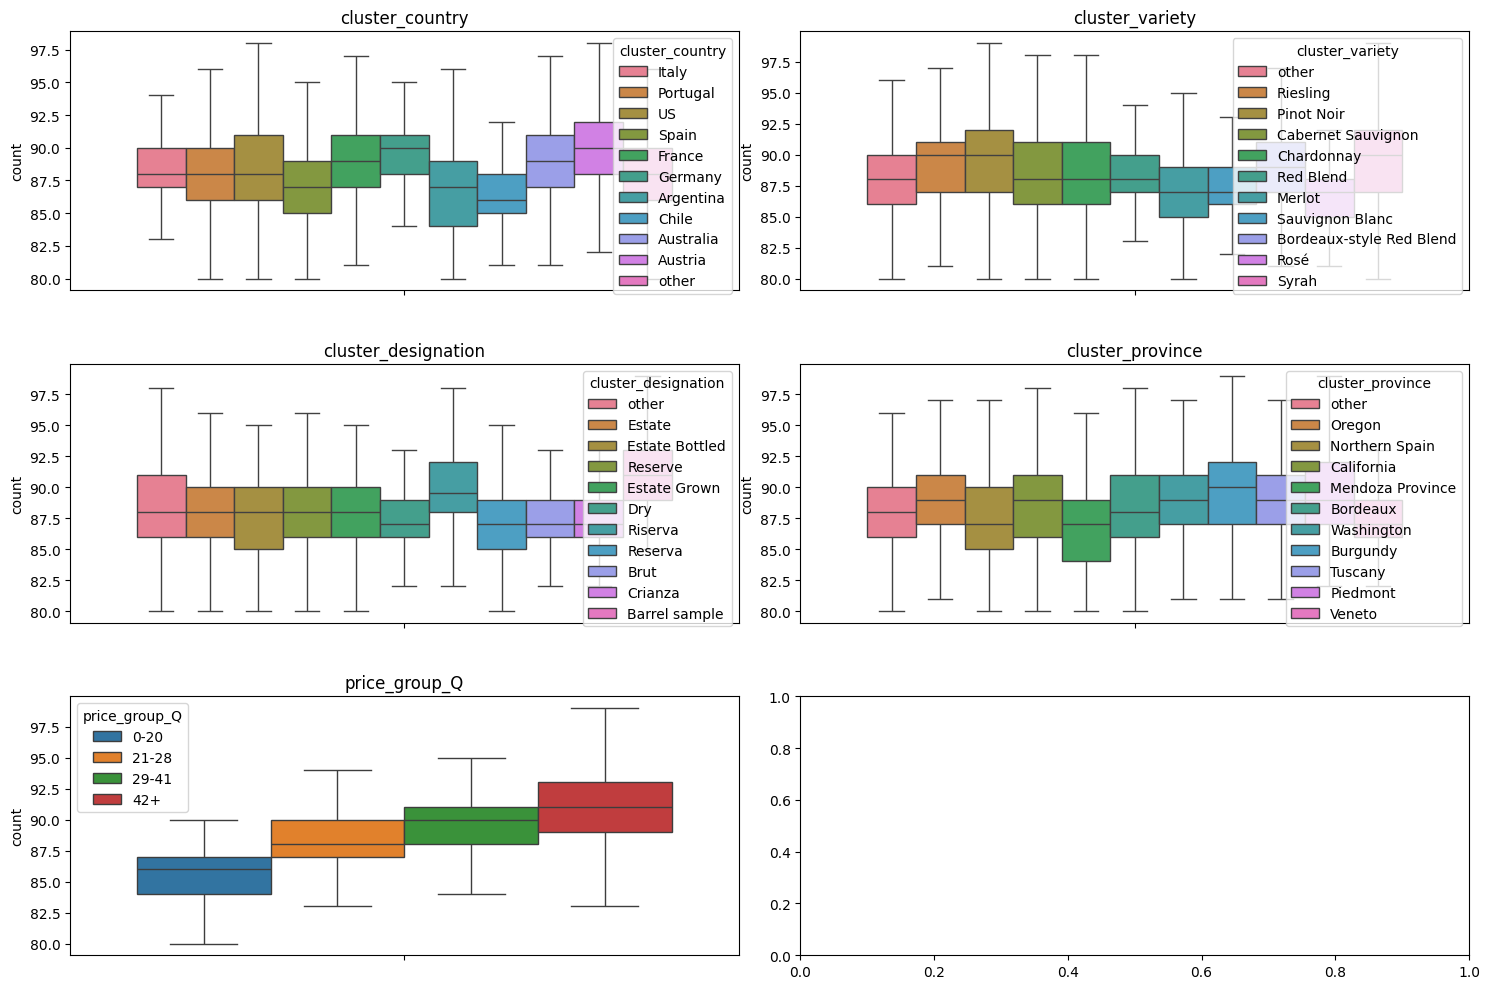

In [45]:
i= 0
nb_col = 2
nb_lig = 3
clusters = ['cluster_country', 'cluster_variety', 'cluster_designation', 'cluster_province', 'price_group_Q']

fig, axes = plt.subplots(nb_lig, nb_col, figsize=(15,10))

for cluster in clusters:
    sns.boxplot(data= df, y= 'points', ax= axes[i//nb_col, i%nb_col], showfliers=False, hue= cluster)
    axes[i//nb_col, i%nb_col].set_title(cluster)
    axes[i//nb_col, i%nb_col].set_ylabel('count')
    i+=1

plt.tight_layout()
plt.show()

## 1.5- Conclusion de l'analyse exploratoire des données

Dans le dataset, il y a une relation entre les cluster de points (notation des vins) et les prix de vente avec une corrélation faible entre les variables numérqiues.

Il n'y a cependant pas de relation clairement établi evec les autres variable catégorielle tel que le pays , le cepage ou la désignation du vin (Sauf peut etre pour la désignation échantillon des barriques --> peut etre faussé car le produit est testé avant d'être mis en bouteille)  

Il y a une correlation entre les prix et les points quand les données sont regroupés par pays.  

En terme de localisation , 80% des vins viennent de 5 pays différents. Les vins restants (20%)sont pour le reste des pays (39)  

Il y a 8 cépages qui concernent 50% des vins. Les 700 autres classes de cépages sont répartits dans les 50% des vins restant.

Les 10 provinces les plus fréquement représenté concernent 62 % des vins. Les 416 autres provinces se partagent les 38% des vins restants.

Il ne semblent pas y avoir une relation clairement établie avec les différentes variables catégorielles, cependant les dernier quartiles de certainne catégories de varriable ont une valeur plus élevé que les autres:
- Pays : Italy
- Cépage : Cabernet Sauvignon
- désignation : Riserva et Barrel sample
- Province : Piemont, Burgundy et Tuscany

En conclusion, il est difficile d'établir une relation entre les variables catégorielles et le prix des vins, même avec un clustering sur ces variables. Cependant, les derniers quartiles des catégories de vins ont une valeur plus élevé que les autres, ce qui peut indiquer une influence significative sur le prix des vins.
Il sera donc préférable de prendre en considération les clusters pour établir le modèle de prédiction.
Egalement, il est à intégrer l'analyse NLP des variables description et title pour essayer de rendre le modèle plus précis.

## 1.6- Enregistrement des données préparées

In [46]:
df_clean = df.copy()

In [47]:
df_clean.drop(columns= ['region_2', 'taster_name', 'taster_twitter_handle', 'title_clean', 'description_clean', 'designation', 'price_group', 'price_group_Q', 'cluster_designation'], inplace= True)


In [48]:
df_clean.isna().sum()

country                0
description            0
points                 0
price               8993
province               0
region_1               0
title                  0
variety                1
winery                 0
milesime            4626
points_group_Q         0
cluster_country        0
cluster_variety        1
cluster_province       0
dtype: int64

In [49]:
# Suppression des  lignes contenant des NaN
df_clean = df_clean.dropna(subset=['variety', 'cluster_variety', 'milesime', 'price'])


In [50]:
df_clean.to_parquet('data_clean.parquet')

In [51]:
del df_clean, df